Os arquivos compactados no arquivo dados_CAPES_2018-04-06.zip trazem dados sobre os programas de pós-graduação em Informática de algumas instituições em 2017. Tratam-se de dados públicos, obtidos da plataforma Sucupira da CAPES (https://sucupira.capes.gov.br/sucupira/). 

O objetivo do trabalho T1.1 é fazer uma análise descritiva e responder algumas perguntas sobre os dados. Sempre que possível, as respostas devem ser dadas numérica e visualmente.

## Docentes
1) Quantos professores (docentes) havia em cada programa em 2017, em cada quadro (permanente, colaborador, visitante)?

## Discentes
2) Quantos alunos (discentes) de Mestrado/Doutorado havia em cada programa em 2017?

## Discentes x Docentes
3) Qual foi a taxa de alunos de Mestrado/Doutorado por professor do quadro permanente em cada programa em 2017?

4) Qual foi a distribuição de alunos de Mestrado/Doutorado pelos professores de cada programa em 2017?

## Trabalhos de Conclusão
5) Quantos alunos de Mestrado/Doutorado defenderam suas dissertações/teses em 2017 (arquivo trabalhos.csv)?

6) Como os trabalhos de Mestrado/Doutorado defendidos em 2017 foram distribuídos pelas áreas de pesquisa dos programas?

7) Como as defesas de Mestrado/Doutorado foram distribuídas ao longo do ano de 2017?

## Discentes x Trabalhos de Conclusão
8) Qual fração de alunos de Mestrado/Doutorado (do total em cada programa) defendeu em 2017?

## Produção
9) Quantos artigos de periódico/trabalhos em anais foram publicados por cada programa em 2017?

10) Qual é a taxa de artigos de periódico/trabalhos em anais por número de docentes permanentes de cada programa em 2017?

11) Qual fração de artigos de periódico/trabalhos em anais publicados em 2017 teve a coautoria de discentes?

12) Qual fração de artigos de periódico/trabalhos em anais publicados em 2017 teve a coautoria de participantes externos?

## Produção x Qualis
13) Qual é a distribuição de artigos de periódico publicados em 2017, por estrato do Qualis?

14) Considerando os pesos dos artigos de cada estrato do índice restrito ({'A1': 1, 'A2': 0.85, 'B1': 0.70}), qual o índice restrito relativo de cada programa, considerando apenas os artigos em periódicos, e dividido pelo número de docentes permanentes (ordenado do maior para o menor)?

15) Considerando os pesos dos artigos de cada estrato do índice geral ({'A1': 1, 'A2': 0.85, 'B1': 0.70, 'B2': 0.50, 'B3': 0.20, 'B4': 0.10, 'B5': 0.05, 'C': 0.0}), qual o índice geral relativo de cada programa, considerando apenas os artigos em periódicos, e dividido pelo número de docentes permanentes (ordenado do maior para o menor)?

In [219]:
import pandas as pd
   
# lendo csv local para um dataframe pandas
def read_file(filename):
    csv_file = filename
    data_raw = pd.read_csv(csv_file).drop_duplicates()
    _data_ = data_raw
    _data_.shape
    return _data_

def plot_hbarchart(y, x_labels, label1, title):
    x = range(len(x_labels))
    bar_width = 0.35
    plt.figure()
    plt.barh(x, y, height = bar_width, color='#4466cc', label=label1)
    plt.title(title)
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

    _ = plt.yticks(x, x_labels)

def plot_dhbarchart(x, y, y2, x_labels, label1, label2, title):
    bar_width = 0.35
    plt.figure()
    plt.barh(x, y, height = bar_width, color='#4466cc', label=label1)
    plt.barh(x, y2, height = bar_width, left=y, color='#cc6644', label=label2)
    plt.title(title)
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

    _ = plt.yticks(x, x_labels)
    
def dbarchart(x_labels, y, y2, label1,label2, title):
    bar_width = 0.35
    x2 = []
    x = np.arange(len(x_labels))
    fig, ax = plt.subplots()
    print(y2) 
    ax.barh(x, y, bar_width, color='red', label=label1)
    ax.barh(x + bar_width, y2, bar_width, color='green', label=label2)

    ax.set(yticks=x + bar_width, yticklabels=x_labels, ylim=[2*bar_width - 1, len(x_labels)])
    ax.legend()

    plt.show()
 

# E1) Solução

Quantos professores (docentes) havia em cada programa em 2017, em cada quadro (permanente, colaborador, visitante)?

In [220]:
docentes_data = read_file("in.data/docentes.csv")
discentes_data = read_file("in.data/discentes.csv")
trabalhos_data = read_file("in.data/trabalhos.csv")
docentes_data.rename(columns = {'categoria': 'CATEGORIA', 'ies': 'IES', 'nome': 'NOME', 'prof_id': 'ID DO PROFESSOR'}, inplace=True)


In [221]:
# dando merge dos dois dataframes pela coluna orientador
docentes_discentes = docentes_data.merge(discentes_data, left_on='NOME', right_on='orientador')
# examinando as 5 primeiras linhas do dataframe
docentes_discentes.head(30)

,CATEGORIA,IES,NOME,ID DO PROFESSOR,abrev,curso,data_matricula,deficiencia,discente_id,ies,nacionalidade,nivel,nome,orientador,orientadores,programa,raca,sexo,situacao
0,PERMANENTE,PONTIFÍCIA UNIVERSIDADE CATÓLICA DO RIO DE JAN...,ALBERTO BARBOSA RAPOSO,45079,"BUSSON, ANTONIO JOSE G. BUSSON, ANTONIO JOSE G...",INFORMÁTICA,10/08/2017,Não,1180062,PONTIFÍCIA UNIVERSIDADE CATÓLICA DO RIO DE JAN...,Brasil,Doutorado,ANTONIO JOSE GRANDSON BUSSON,ALBERTO BARBOSA RAPOSO,"[{'nome': 'ALBERTO BARBOSA RAPOSO', 'categoria...",INFORMÁTICA(31005012004P9),Não declarado,Masculino,MATRICULADO
1,PERMANENTE,PONTIFÍCIA UNIVERSIDADE CATÓLICA DO RIO DE JAN...,ALBERTO BARBOSA RAPOSO,45079,"GONZALEZ, A. E. M. (Principal) GONZALEZ, ARMAN...",INFORMÁTICA,26/08/2014,Não,733930,PONTIFÍCIA UNIVERSIDADE CATÓLICA DO RIO DE JAN...,Cuba,Mestrado,ARMANDO ENRIQUE MARTINEZ GONZALEZ,ALBERTO BARBOSA RAPOSO,"[{'nome': 'ALBERTO BARBOSA RAPOSO', 'categoria...",INFORMÁTICA(31005012004P9),-,Masculino,TITULADO
2,PERMANENTE,PONTIFÍCIA UNIVERSIDADE CATÓLICA DO RIO DE JAN...,ALBERTO BARBOSA RAPOSO,45079,"KAPPS, G. W KAPPS, G. W. (Principal)",INFORMÁTICA,12/08/2014,Não,715284,PONTIFÍCIA UNIVERSIDADE CATÓLICA DO RIO DE JAN...,Brasil,Doutorado,GRAZIELE WEINCHUTZ KAPPS,ALBERTO BARBOSA RAPOSO,"[{'nome': 'ALBERTO BARBOSA RAPOSO', 'categoria...",INFORMÁTICA(31005012004P9),-,Feminino,MATRICULADO
3,PERMANENTE,PONTIFÍCIA UNIVERSIDADE CATÓLICA DO RIO DE JAN...,ALBERTO BARBOSA RAPOSO,45079,"CURASMA, H. P. (Principal)",INFORMÁTICA,03/08/2015,Sim,887650,PONTIFÍCIA UNIVERSIDADE CATÓLICA DO RIO DE JAN...,Brasil,Mestrado,HERMINIO PAUCAR CURASMA,ALBERTO BARBOSA RAPOSO,"[{'nome': 'ALBERTO BARBOSA RAPOSO', 'categoria...",INFORMÁTICA(31005012004P9),Não dispõe da informação,Masculino,TITULADO
4,PERMANENTE,PONTIFÍCIA UNIVERSIDADE CATÓLICA DO RIO DE JAN...,ALBERTO BARBOSA RAPOSO,45079,"PALOMARES PECHO, JESSICA MARGARITA (Principal)",INFORMÁTICA,02/03/2015,Não,853572,PONTIFÍCIA UNIVERSIDADE CATÓLICA DO RIO DE JAN...,Peru,Doutorado,JESSICA MARGARITA PALOMARES PECHO,ALBERTO BARBOSA RAPOSO,"[{'nome': 'ALBERTO BARBOSA RAPOSO', 'categoria...",INFORMÁTICA(31005012004P9),-,Feminino,MATRICULADO
5,PERMANENTE,PONTIFÍCIA UNIVERSIDADE CATÓLICA DO RIO DE JAN...,ALBERTO BARBOSA RAPOSO,45079,"CRUZ, L. C. (Principal) DA CRUZ, LEONARDO C. C...",INFORMÁTICA,01/03/2017,Não,1131984,PONTIFÍCIA UNIVERSIDADE CATÓLICA DO RIO DE JAN...,Brasil,Doutorado,LEONARDO CARDIA DA CRUZ,ALBERTO BARBOSA RAPOSO,"[{'nome': 'ALBERTO BARBOSA RAPOSO', 'categoria...",INFORMÁTICA(31005012004P9),Não declarado,Masculino,MATRICULADO
6,PERMANENTE,PONTIFÍCIA UNIVERSIDADE CATÓLICA DO RIO DE JAN...,ALBERTO BARBOSA RAPOSO,45079,"ALVES, P. H. C. (Principal)",INFORMÁTICA,02/03/2015,Não,841495,PONTIFÍCIA UNIVERSIDADE CATÓLICA DO RIO DE JAN...,Brasil,Mestrado,PAULO HENRIQUE CARDOSO ALVES,ALBERTO BARBOSA RAPOSO,"[{'nome': 'ALBERTO BARBOSA RAPOSO', 'categoria...",INFORMÁTICA(31005012004P9),Não declarado,Masculino,TITULADO
7,PERMANENTE,PONTIFÍCIA UNIVERSIDADE CATÓLICA DO RIO DE JAN...,ALBERTO BARBOSA RAPOSO,45079,"ABREU, P. F. (Principal) BRAZ, P. F. A. BRAZ, ...",INFORMÁTICA,01/08/2011,Não,273516,PONTIFÍCIA UNIVERSIDADE CATÓLICA DO RIO DE JAN...,Brasil,Doutorado,PRISCILLA FONSECA DE ABREU BRAZ,ALBERTO BARBOSA RAPOSO,"[{'nome': 'ALBERTO BARBOSA RAPOSO', 'categoria...",INFORMÁTICA(31005012004P9),Não declarado,Feminino,TITULADO
8,PERMANENTE,PONTIFÍCIA UNIVERSIDADE CATÓLICA DO RIO DE JAN...,ALBERTO BARBOSA RAPOSO,45079,"ROCHA, R. H. S. (Principal)",INFORMÁTICA,10/08/2015,Não,887700,PONTIFÍCIA UNIVERSIDADE CATÓLICA DO RIO DE JAN...,Brasil,Doutorado,RAFAEL HENRIQUE SANTOS ROCHA,ALBERTO BARBOSA RAPOSO,"[{'nome': 'ALBERTO BARBOSA RAPOSO', 'categoria...",INFORMÁTICA(31005012004P9),Não declarado,Masculino,MATRICULADO
9,PERMANENTE,PONTIFÍCIA UNIVERSIDADE CATÓLICA DO RIO DE JAN...,ALBERTO BARBOSA RAPOSO,45079,"SOUZA, R. P. (Principal)",INFORMÁTICA,14/02/2014,Não,668899,PONTIFÍCIA UNIVERSIDADE CATÓLICA DO RIO DE JAN...,Brasil,Doutorado,ROGERIO PINHEIRO DE SOUZA,ALBERTO

In [222]:
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

colaborador = docentes_discentes.groupby(['CATEGORIA', 'programa'])['NOME'].nunique()['COLABORADOR']
permanente = docentes_discentes.groupby(['CATEGORIA', 'programa'])['NOME'].nunique()['PERMANENTE']
colaborador

programa
CIÊNCIA DA COMPUTAÇÃO(33002010176P0)                                 3
CIÊNCIA DA COMPUTAÇÃO(33003017005P8)                                 1
CIÊNCIAS DA COMPUTAÇÃO E MATEMÁTICA COMPUTACIONAL(33002045004P1)     6
CIÊNCIAS DA COMPUTAÇÃO(25001019004P6)                               14
CIÊNCIAS DA COMPUTAÇÃO(32001010004P6)                                5
COMPUTAÇÃO(42001013004P4)                                            3
INFORMÁTICA(31001017110P8)                                           2
INFORMÁTICA(31005012004P9)                                           1
Name: NOME, dtype: int64

[1, 0, 0, 5, 14, 3, 2, 1, 3, 6]


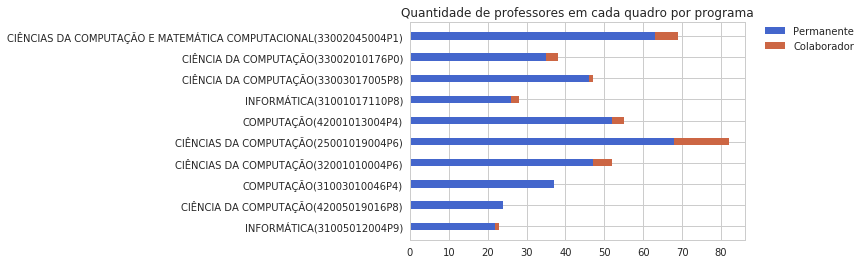

In [223]:
y = []
y2 = []
x_labels = docentes_discentes['programa'].unique()
for programa in x_labels:
    if not pd.isnull(programa):
        if programa in permanente.keys():
            y.append(permanente[programa])
        else:
            y.append(0)
        if programa in colaborador.keys():
            y2.append(colaborador[programa])
        else:
            y2.append(0)

x = range(len(x_labels))
print(y2)
plot_dhbarchart(x, y, y2, x_labels, "Permanente", "Colaborador", "Quantidade de professores em cada quadro por programa")

[1, 0, 0, 5, 14, 3, 2, 1, 3, 6]


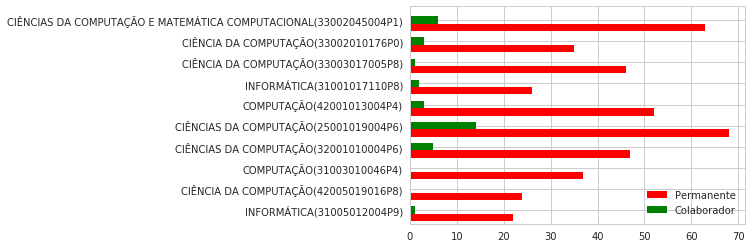

In [224]:

dbarchart(x_labels, y, y2, 'Permanente', 'Colaborador', "Quantidade de professores em cada quadro por programa")

# E2) Solução

Quantos alunos (discentes) de Mestrado/Doutorado havia em cada programa em 2017?

In [225]:
programas = discentes_data['programa'].dropna().unique()

nivel_by_program = discentes_data.groupby(['nivel', 'programa'])['discente_id'].nunique()
mestrado_by_program = nivel_by_program['Mestrado']
doutorado_by_program = nivel_by_program['Doutorado']
nivel_by_program
# print()
# colaborador = discentes_data.groupby(['nivel', 'programa'])['discente_id'].nunique()['COLABORADOR']
# permanente = docentes_discentes.groupby(['CATEGORIA', 'programa'])['NOME'].nunique()['PERMANENTE']
# colaborador
# discentes_data.head()

nivel      programa                                                        
Doutorado  CIÊNCIA DA COMPUTAÇÃO(33002010176P0)                                111
           CIÊNCIA DA COMPUTAÇÃO(33003017005P8)                                170
           CIÊNCIA DA COMPUTAÇÃO(42005019016P8)                                 91
           CIÊNCIAS DA COMPUTAÇÃO E MATEMÁTICA COMPUTACIONAL(33002045004P1)    318
           CIÊNCIAS DA COMPUTAÇÃO(25001019004P6)                               379
           CIÊNCIAS DA COMPUTAÇÃO(32001010004P6)                               173
           COMPUTAÇÃO(31003010046P4)                                           114
           COMPUTAÇÃO(42001013004P4)                                           125
           INFORMÁTICA(31001017110P8)                                           63
           INFORMÁTICA(31005012004P9)                                           97
Graduação  CIÊNCIA DA COMPUTAÇÃO(33003017005P8)                                 30
           

[97, 91, 114, 173, 379, 125, 63, 170, 111, 318]
[97, 91, 114, 173, 379, 125, 63, 170, 111, 318]


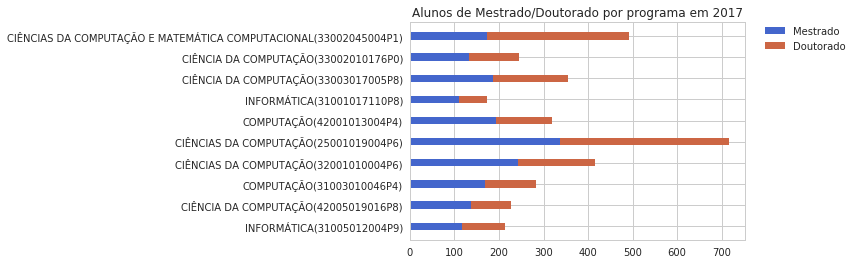

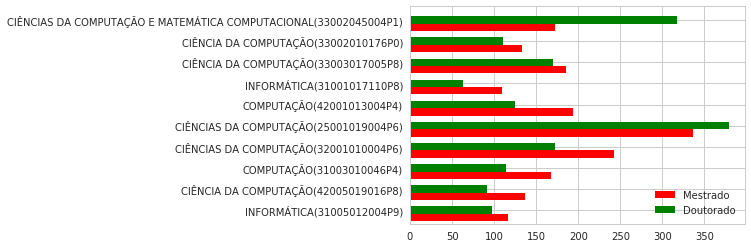

In [226]:
import numpy as np

y = []
y2 = []
x_labels = []
for programa in programas:
    if not pd.isnull(programa):
        x_labels.append(programa)
        y.append(mestrado_by_program[programa])
        y2.append(nivel_by_program['Doutorado'][programa])
print(y2)
x = range(len(x_labels))

plot_dhbarchart(x, y, y2, x_labels, 'Mestrado', 'Doutorado', 'Alunos de Mestrado/Doutorado por programa em 2017')
dbarchart(x_labels, y, y2, 'Mestrado', 'Doutorado', 'Alunos de Mestrado/Doutorado por programa em 2017')


# E3) Solução

Qual foi a taxa de alunos de Mestrado/Doutorado por professor do quadro permanente em cada programa em 2017?

In [227]:
nivel_programa_professor = docentes_discentes.groupby(['nivel', 'programa', 'orientador']).mean()['discente_id']
nivel_programa_professor
# nivel_programa_professor = pd.DataFrame(nivel_programa_professor)
# nivel_programa_professor.apply(pd.DataFrame.describe, axis=1)
# docentes_discentes.groupby(['nivel', 'programa', 'orientador']).describe()

nivel      programa                              orientador                              
Doutorado  CIÊNCIA DA COMPUTAÇÃO(33002010176P0)  ALAIR PEREIRA DO LAGO                       7.331820e+05
                                                 ALAN MITCHELL DURHAM                        7.302970e+05
                                                 ALFREDO GOLDMAN VEL LEJBMAN                 8.246973e+05
                                                 ANA CRISTINA VIEIRA DE MELO                 8.635238e+05
                                                 ANAROSA ALVES FRANCO BRANDAO                7.470175e+05
                                                 ANDRE FUJITA                                8.161843e+05
                                                 CARLOS HITOSHI MORIMOTO                     7.544497e+05
                                                 CRISTINA GOMES FERNANDES                    8.769750e+05
                                                 DANIEL MACEDO

##### 

In [228]:
print(nivel_programa_professor)

nivel      programa                              orientador                              
Doutorado  CIÊNCIA DA COMPUTAÇÃO(33002010176P0)  ALAIR PEREIRA DO LAGO                       7.331820e+05
                                                 ALAN MITCHELL DURHAM                        7.302970e+05
                                                 ALFREDO GOLDMAN VEL LEJBMAN                 8.246973e+05
                                                 ANA CRISTINA VIEIRA DE MELO                 8.635238e+05
                                                 ANAROSA ALVES FRANCO BRANDAO                7.470175e+05
                                                 ANDRE FUJITA                                8.161843e+05
                                                 CARLOS HITOSHI MORIMOTO                     7.544497e+05
                                                 CRISTINA GOMES FERNANDES                    8.769750e+05
                                                 DANIEL MACEDO

In [229]:
docentes_discentes

,CATEGORIA,IES,NOME,ID DO PROFESSOR,abrev,curso,data_matricula,deficiencia,discente_id,ies,nacionalidade,nivel,nome,orientador,orientadores,programa,raca,sexo,situacao
0,PERMANENTE,PONTIFÍCIA UNIVERSIDADE CATÓLICA DO RIO DE JAN...,ALBERTO BARBOSA RAPOSO,45079,"BUSSON, ANTONIO JOSE G. BUSSON, ANTONIO JOSE G...",INFORMÁTICA,10/08/2017,Não,1180062,PONTIFÍCIA UNIVERSIDADE CATÓLICA DO RIO DE JAN...,Brasil,Doutorado,ANTONIO JOSE GRANDSON BUSSON,ALBERTO BARBOSA RAPOSO,"[{'nome': 'ALBERTO BARBOSA RAPOSO', 'categoria...",INFORMÁTICA(31005012004P9),Não declarado,Masculino,MATRICULADO
1,PERMANENTE,PONTIFÍCIA UNIVERSIDADE CATÓLICA DO RIO DE JAN...,ALBERTO BARBOSA RAPOSO,45079,"GONZALEZ, A. E. M. (Principal) GONZALEZ, ARMAN...",INFORMÁTICA,26/08/2014,Não,733930,PONTIFÍCIA UNIVERSIDADE CATÓLICA DO RIO DE JAN...,Cuba,Mestrado,ARMANDO ENRIQUE MARTINEZ GONZALEZ,ALBERTO BARBOSA RAPOSO,"[{'nome': 'ALBERTO BARBOSA RAPOSO', 'categoria...",INFORMÁTICA(31005012004P9),-,Masculino,TITULADO
2,PERMANENTE,PONTIFÍCIA UNIVERSIDADE CATÓLICA DO RIO DE JAN...,ALBERTO BARBOSA RAPOSO,45079,"KAPPS, G. W KAPPS, G. W. (Principal)",INFORMÁTICA,12/08/2014,Não,715284,PONTIFÍCIA UNIVERSIDADE CATÓLICA DO RIO DE JAN...,Brasil,Doutorado,GRAZIELE WEINCHUTZ KAPPS,ALBERTO BARBOSA RAPOSO,"[{'nome': 'ALBERTO BARBOSA RAPOSO', 'categoria...",INFORMÁTICA(31005012004P9),-,Feminino,MATRICULADO
3,PERMANENTE,PONTIFÍCIA UNIVERSIDADE CATÓLICA DO RIO DE JAN...,ALBERTO BARBOSA RAPOSO,45079,"CURASMA, H. P. (Principal)",INFORMÁTICA,03/08/2015,Sim,887650,PONTIFÍCIA UNIVERSIDADE CATÓLICA DO RIO DE JAN...,Brasil,Mestrado,HERMINIO PAUCAR CURASMA,ALBERTO BARBOSA RAPOSO,"[{'nome': 'ALBERTO BARBOSA RAPOSO', 'categoria...",INFORMÁTICA(31005012004P9),Não dispõe da informação,Masculino,TITULADO
4,PERMANENTE,PONTIFÍCIA UNIVERSIDADE CATÓLICA DO RIO DE JAN...,ALBERTO BARBOSA RAPOSO,45079,"PALOMARES PECHO, JESSICA MARGARITA (Principal)",INFORMÁTICA,02/03/2015,Não,853572,PONTIFÍCIA UNIVERSIDADE CATÓLICA DO RIO DE JAN...,Peru,Doutorado,JESSICA MARGARITA PALOMARES PECHO,ALBERTO BARBOSA RAPOSO,"[{'nome': 'ALBERTO BARBOSA RAPOSO', 'categoria...",INFORMÁTICA(31005012004P9),-,Feminino,MATRICULADO
5,PERMANENTE,PONTIFÍCIA UNIVERSIDADE CATÓLICA DO RIO DE JAN...,ALBERTO BARBOSA RAPOSO,45079,"CRUZ, L. C. (Principal) DA CRUZ, LEONARDO C. C...",INFORMÁTICA,01/03/2017,Não,1131984,PONTIFÍCIA UNIVERSIDADE CATÓLICA DO RIO DE JAN...,Brasil,Doutorado,LEONARDO CARDIA DA CRUZ,ALBERTO BARBOSA RAPOSO,"[{'nome': 'ALBERTO BARBOSA RAPOSO', 'categoria...",INFORMÁTICA(31005012004P9),Não declarado,Masculino,MATRICULADO
6,PERMANENTE,PONTIFÍCIA UNIVERSIDADE CATÓLICA DO RIO DE JAN...,ALBERTO BARBOSA RAPOSO,45079,"ALVES, P. H. C. (Principal)",INFORMÁTICA,02/03/2015,Não,841495,PONTIFÍCIA UNIVERSIDADE CATÓLICA DO RIO DE JAN...,Brasil,Mestrado,PAULO HENRIQUE CARDOSO ALVES,ALBERTO BARBOSA RAPOSO,"[{'nome': 'ALBERTO BARBOSA RAPOSO', 'categoria...",INFORMÁTICA(31005012004P9),Não declarado,Masculino,TITULADO
7,PERMANENTE,PONTIFÍCIA UNIVERSIDADE CATÓLICA DO RIO DE JAN...,ALBERTO BARBOSA RAPOSO,45079,"ABREU, P. F. (Principal) BRAZ, P. F. A. BRAZ, ...",INFORMÁTICA,01/08/2011,Não,273516,PONTIFÍCIA UNIVERSIDADE CATÓLICA DO RIO DE JAN...,Brasil,Doutorado,PRISCILLA FONSECA DE ABREU BRAZ,ALBERTO BARBOSA RAPOSO,"[{'nome': 'ALBERTO BARBOSA RAPOSO', 'categoria...",INFORMÁTICA(31005012004P9),Não declarado,Feminino,TITULADO
8,PERMANENTE,PONTIFÍCIA UNIVERSIDADE CATÓLICA DO RIO DE JAN...,ALBERTO BARBOSA RAPOSO,45079,"ROCHA, R. H. S. (Principal)",INFORMÁTICA,10/08/2015,Não,887700,PONTIFÍCIA UNIVERSIDADE CATÓLICA DO RIO DE JAN...,Brasil,Doutorado,RAFAEL HENRIQUE SANTOS ROCHA,ALBERTO BARBOSA RAPOSO,"[{'nome': 'ALBERTO BARBOSA RAPOSO', 'categoria...",INFORMÁTICA(31005012004P9),Não declarado,Masculino,MATRICULADO
9,PERMANENTE,PONTIFÍCIA UNIVERSIDADE CATÓLICA DO RIO DE JAN...,ALBERTO BARBOSA RAPOSO,45079,"SOUZA, R. P. (Principal)",INFORMÁTICA,14/02/2014,Não,668899,PONTIFÍCIA UNIVERSIDADE CATÓLICA DO RIO DE JAN...,Brasil,Doutorado,ROGERIO PINHEIRO DE SOUZA,ALBERTO

# E4) Solução

Qual foi a distribuição de alunos de Mestrado/Doutorado pelos professores de cada programa em 2017?

In [230]:
dist = docentes_discentes.groupby(['programa', 'NOME']).discente_id.count()
dist

programa                              NOME                                    
CIÊNCIA DA COMPUTAÇÃO(33002010176P0)  ALAIR PEREIRA DO LAGO                        2
                                      ALAN MITCHELL DURHAM                         4
                                      ALFREDO GOLDMAN VEL LEJBMAN                 12
                                      ANA CRISTINA VIEIRA DE MELO                  8
                                      ANAROSA ALVES FRANCO BRANDAO                 3
                                      ANDRE FUJITA                                10
                                      CARLOS EDUARDO FERREIRA                      3
                                      CARLOS HITOSHI MORIMOTO                      9
                                      CRISTINA GOMES FERNANDES                     2
                                      DANIEL MACEDO BATISTA                        8
                                      DENIS DERATANI MAUA              

# E5) Solução

Quantos alunos de Mestrado/Doutorado defenderam suas dissertações/teses em 2017 (arquivo trabalhos.csv)?

In [231]:
trabalhos_data.head(5)

,abstract,anexo,area,autor,biblioteca,data_defesa,idioma,ies,keywords,linha,orientador,paginas,palavras_chave,programa,projeto_pesquisa,resumo,tipo,titulo,trabalho_id,volume
0,Spatial concentrations (or spatial clusters) o...,Marcos P. Roriz_2017_Completo.pdf,REDES DE COMPUTADORES E SISTEMAS DISTRIBUÍDOS,MARCOS PAULINO RORIZ JUNIOR,PONTIFÍCIA UNIVERSIDADE CATÓLICA DO RIO DE JAN...,22/03/2017,INGLES,PONTIFÍCIA UNIVERSIDADE CATÓLICA DO RIO DE JAN...,b'Spatial Clustering;Stream Clustering;Real-ti...,"REDES MÓVEIS, COMPUTAÇÃO UBÍQUA E COMPUTAÇÃO A...",MARKUS ENDLER,121.0,Aglomeração Espacial;Aglomeração em Fluxo de D...,INFORMÁTICA (31005012004P9),-,"Clusters (ou concentrações) de objetos móveis,...",TESE,DG2CEP: An On-line Algorithm for Real-time Det...,5013040,1
1,Quotation Extraction consists of identifying q...,Rafael dos Reis_2017_Completo.pdf,OTIMIZAÇÃO E RACIOCÍNIO AUTOMÁTICO,RAFAEL DOS REIS SILVA,PONTIFÍCIA UNIVERSIDADE CATÓLICA DO RIO DE JAN...,08/02/2017,INGLES,PONTIFÍCIA UNIVERSIDADE CATÓLICA DO RIO DE JAN...,b'Machine Learning;Natural Language Processing...,"APRENDIZADO DE MÁQUINA, RACIOCÍNIO HEURÍSTICO ...",RUY LUIZ MILIDIU,59.0,Processamento de Linguagem Natural;Extração de...,INFORMÁTICA (31005012004P9),-,A Extração de Citações consiste na identificaç...,DISSERTAÇÃO,Direct and Indirect Quotation Extraction for P...,5013130,1
2,The classification of objects in real contexts...,Luis Marcelo Vital_2017_Completo.pdf,OTIMIZAÇÃO E RACIOCÍNIO AUTOMÁTICO,LUIS MARCELO VITAL ABREU FONSECA,PONTIFÍCIA UNIVERSIDADE CATÓLICA DO RIO DE JAN...,07/03/2017,PORTUGUES,PONTIFÍCIA UNIVERSIDADE CATÓLICA DO RIO DE JAN...,b'Machine Learning;Image Processing;Convolutio...,"APRENDIZADO DE MÁQUINA, RACIOCÍNIO HEURÍSTICO ...",RUY LUIZ MILIDIU,96.0,Aprendizado de Máquina;Processamento de Imagen...,INFORMÁTICA (31005012004P9),-,A classificação de imagens em contexto real é ...,DISSERTAÇÃO,Classificação de Objetos em Contexto Real por ...,5013137,1
3,Quotation Extraction and Attribution is the ta...,Luis Felipe Miller 2017_Completo.pdf,OTIMIZAÇÃO E RACIOCÍNIO AUTOMÁTICO,LUIS FELIPE MULLER DE OLIVEIRA HENRIQUES,PONTIFÍCIA UNIVERSIDADE CATÓLICA DO RIO DE JAN...,08/03/2017,INGLES,PONTIFÍCIA UNIVERSIDADE CATÓLICA DO RIO DE JAN...,b'Machine learning;Natural language processing...,-,RUY LUIZ MILIDIU,68.0,Aprendizado de máquina;Processamento de lingua...,INFORMÁTICA (31005012004P9),-,A Extração e Atribuição de Citações é a tarefa...,DISSERTAÇÃO,Deep Architecture for Quotation Extraction,5017265,1
4,Driving is a daily task that allows individual...,Igor Oliveira_2017_Completo.pdf,REDES DE COMPUTADORES E SISTEMAS DISTRIBUÍDOS,IGOR OLIVEIRA VASCONCELOS,PONTIFÍCIA UNIVERSIDADE CATÓLICA DO RIO DE JAN...,31/03/2017,PORTUGUES,PONTIFÍCIA UNIVERSIDADE CATÓLICA DO RIO DE JAN...,b'Online anomaly detection;complex event proce...,PROJETO E IMPLEMENTAÇÃO DE MIDDLEWARE,MARKUS ENDLER,102.0,Detecção online de anomalia;processamento de e...,INFORMÁTICA (31005012004P9),-,Dirigir é uma tarefa diária que permite uma lo...,TESE,Detecção móvel e online de anomalia em múltipl...,5017316,1


In [232]:
trabalhos_discentes = trabalhos_data.merge(discentes_data, left_on='autor', right_on='nome')

_count_mestrado_tese = 0
_count_doutorado_tese = 0
_count_mestrado_dis = 0
_count_doutorado_dis = 0

for index, item in enumerate(trabalhos_discentes['data_defesa']):
    current_year = pd.to_datetime(item).year
    if not pd.isnull(current_year) and current_year == 2017:
        if trabalhos_discentes['nivel'][index] == 'Mestrado':
            if trabalhos_discentes['tipo'][index] == 'TESE':
                _count_mestrado_tese += 1
            if trabalhos_discentes['tipo'][index] == 'DISSERTAÇÃO':
                _count_mestrado_dis += 1
        if trabalhos_discentes['nivel'][index] == 'Doutorado':
            if trabalhos_discentes['tipo'][index] == 'TESE':
                _count_doutorado_tese += 1
            if trabalhos_discentes['tipo'][index] == 'DISSERTAÇÃO':
                _count_doutorado_dis += 1
            
print("Teses de Mestrado: ", _count_mestrado_tese)
print("Dissertações de Mestrado: ", _count_mestrado_dis)
print("Teses de Doutorado: ", _count_doutorado_tese)    
print("Dissertações de Doutorado: ", _count_doutorado_dis)    
trabalhos_discentes.head()

Teses de Mestrado:  1
Dissertações de Mestrado:  350
Teses de Doutorado:  234
Dissertações de Doutorado:  79


,abstract,anexo,area,autor,biblioteca,data_defesa,idioma,ies_x,keywords,linha,...,ies_y,nacionalidade,nivel,nome,orientador_y,orientadores,programa_y,raca,sexo,situacao
0,Spatial concentrations (or spatial clusters) o...,Marcos P. Roriz_2017_Completo.pdf,REDES DE COMPUTADORES E SISTEMAS DISTRIBUÍDOS,MARCOS PAULINO RORIZ JUNIOR,PONTIFÍCIA UNIVERSIDADE CATÓLICA DO RIO DE JAN...,22/03/2017,INGLES,PONTIFÍCIA UNIVERSIDADE CATÓLICA DO RIO DE JAN...,b'Spatial Clustering;Stream Clustering;Real-ti...,"REDES MÓVEIS, COMPUTAÇÃO UBÍQUA E COMPUTAÇÃO A...",...,PONTIFÍCIA UNIVERSIDADE CATÓLICA DO RIO DE JAN...,Brasil,Doutorado,MARCOS PAULINO RORIZ JUNIOR,MARKUS ENDLER,"[{'nome': 'MARKUS ENDLER', 'categoria': 'Docen...",INFORMÁTICA(31005012004P9),-,Masculino,TITULADO
1,Quotation Extraction consists of identifying q...,Rafael dos Reis_2017_Completo.pdf,OTIMIZAÇÃO E RACIOCÍNIO AUTOMÁTICO,RAFAEL DOS REIS SILVA,PONTIFÍCIA UNIVERSIDADE CATÓLICA DO RIO DE JAN...,08/02/2017,INGLES,PONTIFÍCIA UNIVERSIDADE CATÓLICA DO RIO DE JAN...,b'Machine Learning;Natural Language Processing...,"APRENDIZADO DE MÁQUINA, RACIOCÍNIO HEURÍSTICO ...",...,PONTIFÍCIA UNIVERSIDADE CATÓLICA DO RIO DE JAN...,Brasil,Mestrado,RAFAEL DOS REIS SILVA,RUY LUIZ MILIDIU,"[{'nome': 'RUY LUIZ MILIDIU', 'categoria': 'Do...",INFORMÁTICA(31005012004P9),-,Masculino,TITULADO
2,The classification of objects in real contexts...,Luis Marcelo Vital_2017_Completo.pdf,OTIMIZAÇÃO E RACIOCÍNIO AUTOMÁTICO,LUIS MARCELO VITAL ABREU FONSECA,PONTIFÍCIA UNIVERSIDADE CATÓLICA DO RIO DE JAN...,07/03/2017,PORTUGUES,PONTIFÍCIA UNIVERSIDADE CATÓLICA DO RIO DE JAN...,b'Machine Learning;Image Processing;Convolutio...,"APRENDIZADO DE MÁQUINA, RACIOCÍNIO HEURÍSTICO ...",...,PONTIFÍCIA UNIVERSIDADE CATÓLICA DO RIO DE JAN...,Brasil,Mestrado,LUIS MARCELO VITAL ABREU FONSECA,RUY LUIZ MILIDIU,"[{'nome': 'RUY LUIZ MILIDIU', 'categoria': 'Do...",INFORMÁTICA(31005012004P9),Não declarado,Masculino,TITULADO
3,Quotation Extraction and Attribution is the ta...,Luis Felipe Miller 2017_Completo.pdf,OTIMIZAÇÃO E RACIOCÍNIO AUTOMÁTICO,LUIS FELIPE MULLER DE OLIVEIRA HENRIQUES,PONTIFÍCIA UNIVERSIDADE CATÓLICA DO RIO DE JAN...,08/03/2017,INGLES,PONTIFÍCIA UNIVERSIDADE CATÓLICA DO RIO DE JAN...,b'Machine learning;Natural language processing...,-,...,PONTIFÍCIA UNIVERSIDADE CATÓLICA DO RIO DE JAN...,Brasil,Mestrado,LUIS FELIPE MULLER DE OLIVEIRA HENRIQUES,RUY LUIZ MILIDIU,"[{'nome': 'RUY LUIZ MILIDIU', 'categoria': 'Do...",INFORMÁTICA(31005012004P9),Não declarado,Masculino,TITULADO
4,Driving is a daily task that allows individual...,Igor Oliveira_2017_Completo.pdf,REDES DE COMPUTADORES E SISTEMAS DISTRIBUÍDOS,IGOR OLIVEIRA VASCONCELOS,PONTIFÍCIA UNIVERSIDADE CATÓLICA DO RIO DE JAN...,31/03/2017,PORTUGUES,PONTIFÍCIA UNIVERSIDADE CATÓLICA DO RIO DE JAN...,b'Online anomaly detection;complex event proce...,PROJETO E IMPLEMENTAÇÃO DE MIDDLEWARE,...,PONTIFÍCIA UNIVERSIDADE CATÓLICA DO RIO DE JAN...,Brasil,Doutorado,IGOR OLIVEIRA VASCONCELOS,MARKUS ENDLER,"[{'nome': 'MARKUS ENDLER', 'categoria': 'Docen...",INFORMÁTICA(31005012004P9),-,Masculino,TITULADO


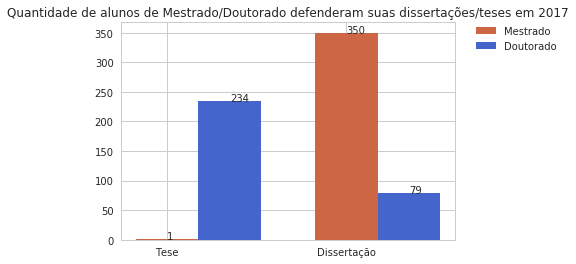

In [233]:
x_labels = ['Tese', 'Dissertação']
bar_width = 0.35
x2 = []
x = range(len(x_labels))
for item in x:
    x2.append(item + bar_width)
y = [_count_mestrado_tese, _count_mestrado_dis]
y2 = [_count_doutorado_tese, _count_doutorado_dis]

plt.figure()
plt.bar(x, y, width = bar_width, color='#cc6644', label='Mestrado')
for a,b in zip(x, y):
    plt.text(a, b, str(b))
plt.bar(x2, y2, width = bar_width, color='#4466cc', label='Doutorado')
for a,b in zip(x2, y2):
    plt.text(a, b, str(b))
plt.title('Quantidade de alunos de Mestrado/Doutorado defenderam suas dissertações/teses em 2017')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
_ = plt.xticks(x, x_labels)

# E6) Solução

Como os trabalhos de Mestrado/Doutorado defendidos em 2017 foram distribuídos pelas áreas de pesquisa dos programas?

In [234]:
import unidecode

area_data_mestrado = {}
area_data_doutorado = {}
x_labels = []

for index, item in enumerate(trabalhos_discentes['area']):
    current_year = pd.to_datetime(trabalhos_discentes['data_defesa'][index]).year
    if not pd.isnull(current_year) and current_year == 2017 and not pd.isnull(item):
        item = unidecode.unidecode(item).upper()
        if item not in x_labels:
            x_labels.append(item)
        area_data_mestrado[item] = 0
        area_data_doutorado[item] = 0
    
for index, item in enumerate(trabalhos_discentes['area']):
    current_year = pd.to_datetime(trabalhos_discentes['data_defesa'][index]).year
    if not pd.isnull(current_year) and current_year == 2017 and not pd.isnull(item):
        item = unidecode.unidecode(item).upper()
        if trabalhos_discentes['nivel'][index] == 'Mestrado':
            area_data_mestrado[item] += 1
        if trabalhos_discentes['nivel'][index] == 'Doutorado':
            area_data_doutorado[item] += 1
        

[18, 4, 2, 5, 1, 0, 1, 8, 2, 1, 79, 11, 24, 10, 5, 1, 3, 22, 4, 20, 2, 4, 5, 6, 9, 3, 13, 50]


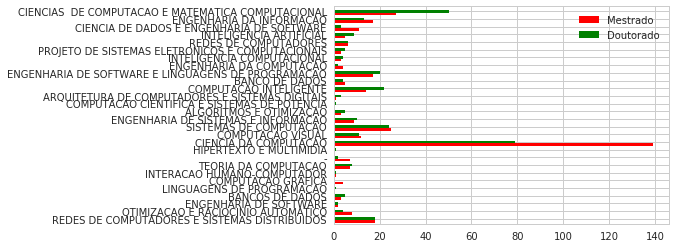

In [235]:
dbarchart(x_labels, list(area_data_mestrado.values()), list(area_data_doutorado.values()), 'Mestrado', 'Doutorado', 'Trabalhos de Mestrado/Doutorado defendidos em 2017 distribuídos pelas áreas de pesquisa dos programas')

# E7) Solução

Como as defesas de Mestrado/Doutorado foram distribuídas ao longo do ano de 2017?

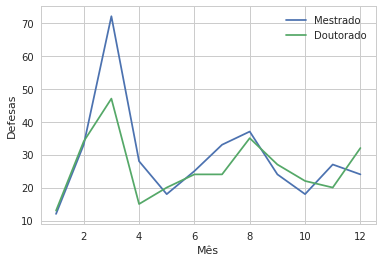

In [236]:
from matplotlib.dates import MonthLocator
import calendar

mestrado_per_month = {}
doutorado_per_month = {}
for index, row in enumerate(trabalhos_discentes['data_defesa']):
    current_month = pd.to_datetime(row).month
    if not pd.isnull(current_month):
        mestrado_per_month[current_month] = 0
        doutorado_per_month[current_month] = 0

for index, row in enumerate(trabalhos_discentes['data_defesa']):
    current_month = pd.to_datetime(row).month
    if not pd.isnull(current_month):
        if trabalhos_discentes['nivel'][index] == 'Mestrado':
            mestrado_per_month[current_month] += 1
        if trabalhos_discentes['nivel'][index] == 'Doutorado':
            doutorado_per_month[current_month] += 1

mordered = {}
for key in sorted(mestrado_per_month.keys()):
    mordered[key] = mestrado_per_month[key]   
dordered = {}
for key in sorted(doutorado_per_month.keys()):
    dordered[key] = doutorado_per_month[key]


plt.figure()
plt.plot(mordered.keys(), mordered.values(), label='Mestrado')
plt.plot(dordered.keys(), dordered.values(), label='Doutorado')
plt.ylabel('Defesas')
plt.xlabel('Mês')
plt.legend()
plt.show()

# E8) Solução
Qual fração de alunos de Mestrado/Doutorado (do total em cada programa) defendeu em 2017?

###### Definir colunas em comum entre as tabelas

In [237]:
common_columns = []
for column_name in discentes_data.columns: # Para cada coluna na tabela de discentes
    if(column_name in trabalhos_data): # Se a coluna existir na tabela de trabalhos
        common_columns.append(column_name) # Marcar como coluna em comum
common_columns

['ies', 'orientador', 'programa']

###### Reorganizar tabelas (retirar colunas desnecessárias para a questão)

In [238]:
# Utilizando variaveis auxiliares para mexer com as tabelas
aux_discentes_data = discentes_data.copy()
aux_trabalhos_data = trabalhos_data.copy()

# Manter somente as colunas necessárias nas tabelas
to_drop_in_discentes = []
for column_name in aux_discentes_data.columns: # Para cada coluna da tabela de discentes
    if(column_name not in common_columns and column_name != 'nivel'): # Selecionar colunas desncessárias
        to_drop_in_discentes.append(column_name)

aux_discentes_data = aux_discentes_data.drop(to_drop_in_discentes, 1) # Retirar colunas desnecessárias

to_drop_in_trabalhos = []
for column_name in aux_trabalhos_data.columns: # Para cada coluna da tabela de trabalhos
    if(column_name not in common_columns and column_name != 'data_defesa'): # Selecionar colunas desncessárias
        to_drop_in_trabalhos.append(column_name)

aux_trabalhos_data = aux_trabalhos_data.drop(to_drop_in_trabalhos, 1)  # Retirar colunas desnecessárias

###### Preparação de dados das tabelas para OUTER JOIN

In [239]:
# Dicionários para guardar strings definitivas (chaves) e as strings equivalentes (valores)
# Ex: PUC-Rio: [PUC-Rio, PUC - RIO, puc rj, puc rio]
possible_ies = {}
possible_programas = {}
possible_orientadores = {}

# Verificar se as strings sao equivalentes
def match_strings(str1, str2, error):
    diffs = 0
    aux_str1 = str1.replace(" ", "")
    aux_str2 = str2.replace(" ", "")
    for a, b in zip(aux_str1, aux_str2):
        if a != b:
            diffs += 1
            if(diffs > error):
                return 0
    return 1

# Tratar strings: tenta  verificar se a string pertence à algum grupo e adicioná-la à ele, ou criar um novo grupo para ela
def treat_string(c, column):
    if(not isinstance(c, str)):
        return c
    else:
        if(column == 'ies'):
            possible_group = possible_ies
            error = 10
        elif(column == 'programa'):
            possible_group = possible_programas
            error = 2
        elif(column == 'orientador'):
            possible_group = possible_orientadores
            error = 2

        # Para cada grupo, verifica se a string stual pertence aquele grupo (igual à uma string daquele grupo)
        for key in possible_group:
            if(c in possible_group[key]):
                return key
                break
            else:
                # Para cada string do grupo, verifica se a string atual é semelhante
                for possible_name in possible_group[key]:
                    if(match_strings(c, possible_name, error)):
                        possible_group[key].append(c);
                        return key
                        break
        # Se a string não se assemelha à nenhum grupo, cria um grupo novo para ela
        possible_group[c] = [c]
        return c
    
# Aplica o tratamento de strings às tabelas auxiliares
for column in aux_discentes_data:
    if(column in common_columns):
        aux_discentes_data[column] = aux_discentes_data[column].apply(treat_string, args=([column]))

for column in aux_trabalhos_data:
    if(column in common_columns):
        aux_trabalhos_data[column] = aux_trabalhos_data[column].apply(treat_string, args=([column]))

###### OUTER JOIN das tabelas auxiliares

In [240]:
# Mergeando as tabelas

merged_discentes_trabalhos = pd.merge(aux_discentes_data, aux_trabalhos_data, how='outer', on=common_columns)

###### Definir dados necessários (total de alunos de mestrado/doutorado por programa e quais deles defenderam em 2017)

In [241]:
import array

# Definir quais são todos os diferentes programas
programas = []

for index, row in merged_discentes_trabalhos.iterrows():
    programa = row['programa']
    if(programa not in programas and isinstance(programa, str)):
        programas.append(programa)

# Definir o total de alunos de mestrado/doutorado em cada programa e quantos desses alunos defenderam em 2017
mestrado_por_programa = array.array('i', (0 for i in range(0, len(programas))))
doutorado_por_programa = array.array('i', (0 for i in range(0, len(programas))))
total_mestrado = array.array('i', (0 for i in range(0, len(programas))))
total_doutorado = array.array('i', (0 for i in range(0, len(programas))))

for index, row in merged_discentes_trabalhos.iterrows():
    programa = row['programa']
    nivel = row['nivel']
    defesa = row['data_defesa']
    if(isinstance(programa, str)):
        index = programas.index(programa)
        if(nivel == 'Mestrado'):
            total_mestrado[index] += 1 # Aluno de Mestrado nesse programa
            if(isinstance(defesa, str)):
                if(defesa[-4:] == '2017'):  # Aluno de Mestrado nesse programa que defendeu em 2017
                    mestrado_por_programa[index] += 1
        elif(nivel == 'Doutorado'):
            total_doutorado[index] += 1 # Aluno de Doutorado nesse programa
            if(isinstance(defesa, str)):
                if(defesa[-4:] == '2017'):  # Aluno de Doutorado nesse programa que defendeu em 2017
                    doutorado_por_programa[index] += 1

# Definir a fração de alunos de mestrado/doutorado que defenderam em 2017 por programa
_final_mestrado_por_programa = []
_final_doutorado_por_programa = []

for programa in programas:
    index = programas.index(programa)
#     print(programa, mestrado_por_programa[index])
    _final_mestrado_por_programa.append(float(mestrado_por_programa[index] / total_mestrado[index] * 100))
    _final_doutorado_por_programa.append(float(doutorado_por_programa[index] / total_doutorado[index] * 100))
         
# Refatorar os nomes dos programas (break lines entre nome do programa e número do programa)
_final_programas = []
        
def treat_x_labels(labels):
    for label in labels:
        index = label.index('(');
        nome_programa = label[:index]
        num_programa = label[index:]
        _final_programas.append(nome_programa + '\n' + num_programa)

treat_x_labels(programas)

###### Agrupar os dados em um DataFrame para a vizualização

In [242]:
# Definir as colunas do data frame
_new_columns = ['programas', 'nivel', 'fracao_alunos']

# Criar data
_new_data = []

# Adicionar dados a data
for programa in _final_programas:
    index = _final_programas.index(programa)
    _new_data.append([programa, 'Mestrado', _final_mestrado_por_programa[index]])
    _new_data.append([programa, 'Doutorado', _final_doutorado_por_programa[index]])

# Criar data frame com as colunas e a data
_new_table = pd.DataFrame(data = _new_data, columns = _new_columns)

###### Gráfico para vizualização dos dados

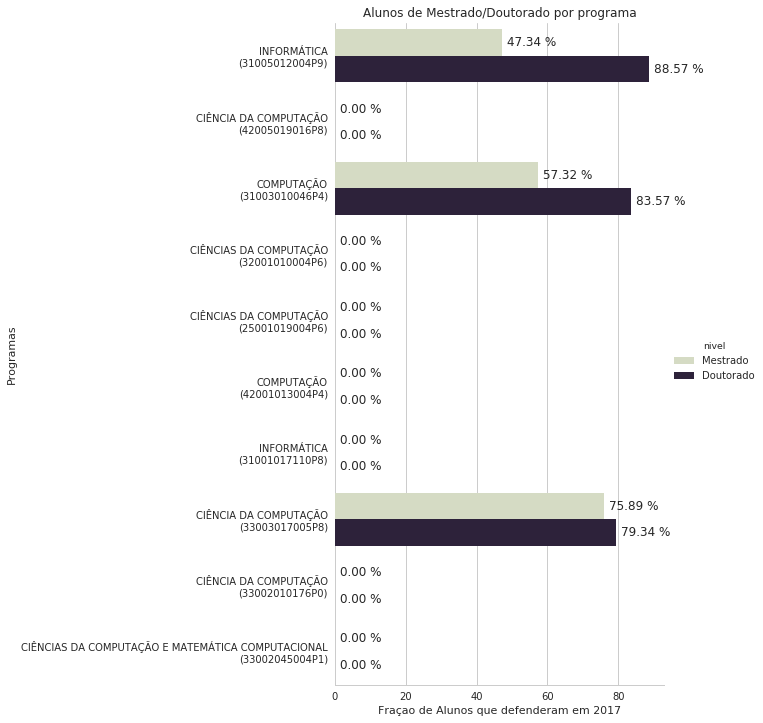

In [243]:
import seaborn as sns
import matplotlib.pyplot as plt

# Preparar gráfico de barras para vizualização
sns.set(style="whitegrid")

# Adicionar dados ao gráfico, definir tipo do gráfico e algumas definições de estilo
g = sns.factorplot(x="fracao_alunos", y="programas", hue="nivel", data=_new_table,
                   size=10, kind="bar", palette=sns.cubehelix_palette(2, start=.5, rot=-.75))

g.despine(left=True)

# Adicionar labels aos eixos
g.set_xlabels("Fraçao de Alunos que defenderam em 2017")
g.set_ylabels("Programas")

# Adionar titulo ao grafico
axes = g.axes.flatten()
axes[0].set_title("Alunos de Mestrado/Doutorado por programa")
# g.set_xticklabels(rotation=30)

# Anotações da porcentagem ao lado das barras
for i, p in enumerate(axes[0].patches):
    axes[0].annotate("{:.{}f} %".format( p.get_width(), 2 ),
                (p.get_x() + p.get_width(), p.get_y() + 0.4),
                xytext=(5, 10), textcoords='offset points')

plt.show()

In [244]:
import pandas as pd

csv_file = "in.data/producao.csv"
producao_raw = pd.read_csv(csv_file)
producao_data = producao_raw

### Questão 9

Quantos artigos de periódico/trabalhos em anais foram publicados por cada programa em 2017?

###### Reorganizar tabelas (retirar colunas desnecessárias para a questão)

In [245]:
# Utilizando uma variavel auxiliar para mexer com a tabela
aux_producao_data = producao_data.copy()

necessary_columns = ['subtipo', 'programa', 'ano']

# Manter somente as colunas necessárias na tabela
to_drop_in_producao = []
for column_name in aux_producao_data.columns: # Para cada coluna da tabela de discentes
    if(column_name not in necessary_columns): # Selecionar colunas desncessárias
        to_drop_in_producao.append(column_name)

aux_producao_data = aux_producao_data.drop(to_drop_in_producao, 1) # Retirar colunas desnecessárias

###### Definir dados necessários (total de artigos de periodico/trabalhos em anais por programa em 2017)

In [246]:
import array

# Definir quais são todos os diferentes programas
programas = []

for index, row in aux_producao_data.iterrows():
    programa = row['programa']
    if(programa not in programas and isinstance(programa, str)):
        programas.append(programa)
        
# Definir o total de artigos de periodico/trabalhos em anais em cada programa em 2017
periodico_por_programa = array.array('i', (0 for i in range(0, len(programas))))
anais_por_programa = array.array('i', (0 for i in range(0, len(programas))))

for index, row in aux_producao_data.iterrows():
    programa = row['programa']
    subtipo = row['subtipo']
    if(isinstance(programa, str)):
        index = programas.index(programa)
        if(isinstance(subtipo, str)):
            if(subtipo == 'TRABALHO EM ANAIS'):
                anais_por_programa[index] += 1
            elif(subtipo == 'ARTIGO EM PERIÓDICO'):
                periodico_por_programa[index] += 1
            
# Refatorar os nomes dos programas (break lines entre nome do programa e número do programa)
_final_programas = []
        
def treat_x_labels(labels):
    for label in labels:
        index = label.index('(');
        nome_programa = label[:index]
        num_programa = label[index:]
        _final_programas.append(nome_programa + '\n' + num_programa)

treat_x_labels(programas)

###### Agrupar os dados em um DataFrame para a vizualização

In [247]:
# Definir as colunas do data frame
_new_columns = ['programa', 'tipo', 'total_tipo']

# Criar data
_new_data = []

# Adicionar dados a data
for programa in _final_programas:
    index = _final_programas.index(programa)
    _new_data.append([programa, 'Artigo de Periodico', periodico_por_programa[index]])
    _new_data.append([programa, 'Trabalho em Anais', anais_por_programa[index]])

# Criar data frame com as colunas e a data
_new_table = pd.DataFrame(data = _new_data, columns = _new_columns)

###### Gráfico para vizualização dos dados

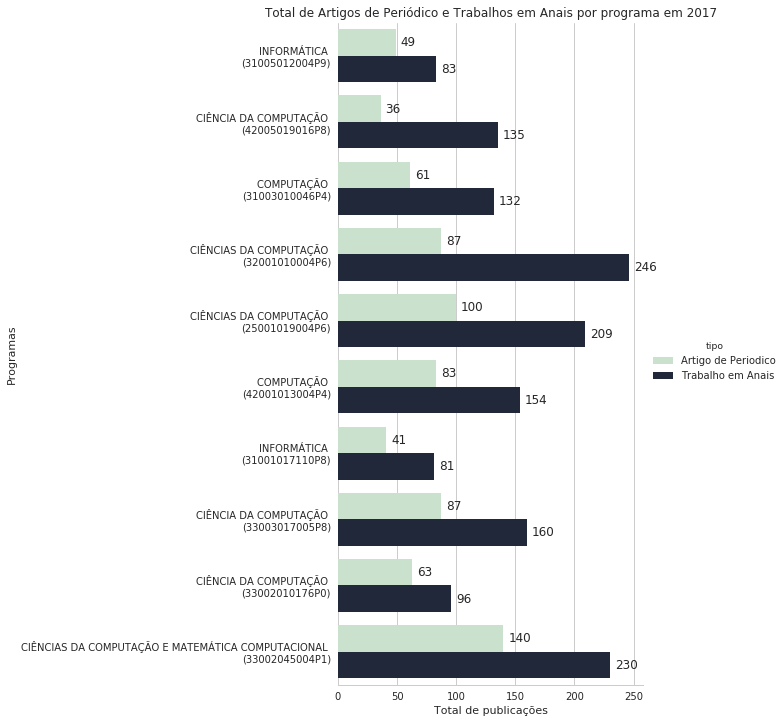

In [248]:
import seaborn as sns
import matplotlib.pyplot as plt

# Preparar gráfico de barras para vizualização
sns.set(style="whitegrid")

# Adicionar dados ao gráfico, definir tipo do gráfico e algumas definições de estilo
g = sns.factorplot(x="total_tipo", y="programa", hue="tipo", data=_new_table,
                   size=10, kind="bar", palette=sns.cubehelix_palette(2, rot=-.4))

g.despine(left=True)

# Adicionar labels aos eixos
g.set_xlabels("Total de publicações")
g.set_ylabels("Programas")

# Adionar titulo ao grafico
axes = g.axes.flatten()
axes[0].set_title("Total de Artigos de Periódico e Trabalhos em Anais por programa em 2017")
# g.set_xticklabels(rotation=30)

# Anotações da porcentagem ao lado das barras
for i, p in enumerate(axes[0].patches):
    axes[0].annotate("{:.{}f}".format( p.get_width(), 0 ),
                (p.get_x() + p.get_width(), p.get_y() + 0.4),
                xytext=(5, 10), textcoords='offset points')

plt.show()

### Questão 10

Qual é a taxa de artigos de periódico/trabalhos em anais por número de docentes permanentes de cada programa em 2017?

###### Definir DataFrame para Tabela de Docentes

In [249]:
import pandas as pd

csv_file = "in.data/docentes.csv"
docentes_raw = pd.read_csv(csv_file)
docentes_data = docentes_raw

###### Reorganizar tabelas (definir colunas necessárias para a questão)

In [250]:
# Utilizando um variaveis auxiliares para mexer com as tabelas
aux_producao_data = producao_data.copy()
aux_docentes_data = docentes_data.copy()

necessary_columns = ['subtipo', 'programa', 'ano', 'paper_autores', 'ies']

# Manter somente as colunas necessárias na tabela
to_drop_in_producao = []
for column_name in aux_producao_data.columns: # Para cada coluna da tabela de discentes
    if(column_name not in necessary_columns): # Selecionar colunas desncessárias
        to_drop_in_producao.append(column_name)

aux_producao_data = aux_producao_data.drop(to_drop_in_producao, 1) # Retirar colunas desnecessárias

In [251]:
# aux_producao_data.head()

In [252]:
# aux_docentes_data.head()

###### Tratar dados para comparação entre tabelas

In [253]:
# Dicionários para guardar strings definitivas (chaves) e as strings equivalentes (valores)
# Ex: PUC-Rio: [PUC-Rio, PUC - RIO, puc rj, puc rio]
possible_ies = {}

# Verificar se as strings sao equivalentes
def match_strings(str1, str2, error):
    diffs = 0
    aux_str1 = str1.replace(" ", "")
    aux_str2 = str2.replace(" ", "")
    for a, b in zip(aux_str1, aux_str2):
        if a != b:
            diffs += 1
            if(diffs > error):
                return 0
    return 1

# Tratar strings: tenta  verificar se a string pertence à algum grupo e adicioná-la à ele, ou criar um novo grupo para ela
def treat_string(c):
    if(not isinstance(c, str)):
        return c
    else:
        possible_group = possible_ies
        error = 10

        # Para cada grupo, verifica se a string stual pertence aquele grupo (igual à uma string daquele grupo)
        for key in possible_group:
            if(c in possible_group[key]):
                return key
                break
            else:
                # Para cada string do grupo, verifica se a string atual é semelhante
                for possible_name in possible_group[key]:
                    if(match_strings(c, possible_name, error)):
                        possible_group[key].append(c);
                        return key
                        break
        # Se a string não se assemelha à nenhum grupo, cria um grupo novo para ela
        possible_group[c] = [c]
        return c
    
def transform_into_list(c):
    if(isinstance(c, str)):
        c = c[2:]
        c = c[:-2]
        c = c.split("', '")
        return c
    
# Aplica o tratamento de strings às tabelas auxiliares
for column in aux_docentes_data:
    if(column == 'ies'):
        aux_docentes_data[column] = aux_docentes_data[column].apply(treat_string)

for column in aux_producao_data:
    if(column == 'paper_autores'):
        aux_producao_data[column] = aux_producao_data[column].apply(transform_into_list)
    if(column == 'ies'):
        aux_producao_data[column] = aux_producao_data[column].apply(treat_string)

###### Definir dados necessários (número de docentes permanentes em cada programa)

In [254]:
# Definir quais são todos os diferentes programas
programas = []

for index, row in aux_producao_data.iterrows():
    programa = row['programa']
    if(programa not in programas and isinstance(programa, str)):
        programas.append(programa)
        
# Separar listas de docentes permanentes por ordem alfabetica
ordem_alfabetica = {}

for index, row in aux_docentes_data.iterrows():
    primeira_letra_nome = row['nome'][:1]
    ies_docente = row['ies']
    categoria = row['categoria']
    if(isinstance(categoria, str) and categoria == 'PERMANENTE'):
        is_in_ordem_alfabetica = 0
        for key in ordem_alfabetica:
            if(key == primeira_letra_nome):
                ordem_alfabetica[key].append([row['nome'], ies_docente])
                is_in_ordem_alfabetica = 1
                break
        if(is_in_ordem_alfabetica == 0):
            ordem_alfabetica[primeira_letra_nome] = [[row['nome'], ies_docente]]

# Definir os docentes permanentes por programa
docentes_por_programa = {}

for programa in programas:
    docentes_por_programa[programa] = []

i = 0
    
for index, row in aux_producao_data.iterrows():
    programa = row['programa']
    autores = row['paper_autores']
    ies = row['ies']
    if(isinstance(programa, str)):
        doc_has_it = 0
        # Para cada autor do artigo/trabalho
        for autor in autores:
            # Verifica se o autor com aquele ies ja esta na lista de docentes_por_programa daquele programa
            for doc_nome, doc_ies in docentes_por_programa[programa]:
                if(autor == doc_nome and ies == doc_ies):
                    doc_has_it = 1
                    break
            # Caso contrário, procura na tabela de docentes pelo autor com aquele ies
            if(doc_has_it == 0):
                primeira_letra_autor = autor[:1]
                try:
                    for ord_nome, ord_ies in ordem_alfabetica[primeira_letra_autor]:
                        if(ord_nome == autor and ord_ies == ies):
                            docentes_por_programa[programa].append([autor, ies])
                            break
                except:
                    # Do nothing
                    i = i
        i += 1

# Definir a fração de alunos de mestrado/doutorado que defenderam em 2017 por programa
_final_periodico_por_programa = []
_final_anais_por_programa = []

for programa in programas:
    index = programas.index(programa)
    _final_periodico_por_programa.append(float(periodico_por_programa[index] / len(docentes_por_programa[programa])))
    _final_anais_por_programa.append(float(anais_por_programa[index] / len(docentes_por_programa[programa])))
         
# Refatorar os nomes dos programas (break lines entre nome do programa e número do programa)
_final_programas = []
        
def treat_x_labels(labels):
    for label in labels:
        index = label.index('(');
        nome_programa = label[:index]
        num_programa = label[index:]
        _final_programas.append(nome_programa + '\n' + num_programa)

treat_x_labels(programas)

###### Agrupar os dados em um DataFrame para a vizualização

In [255]:
# Definir as colunas do data frame
_new_columns = ['programa', 'tipo', 'fracao_tipo']

# Criar data
_new_data = []

# Adicionar dados a data
for programa in _final_programas:
    index = _final_programas.index(programa)
    _new_data.append([programa, 'Artigo de Periodico', _final_periodico_por_programa[index]])
    _new_data.append([programa, 'Trabalho em Anais', _final_anais_por_programa[index]])

# Criar data frame com as colunas e a data
_new_table = pd.DataFrame(data = _new_data, columns = _new_columns)

###### Gráfico para a vizualização dos dados

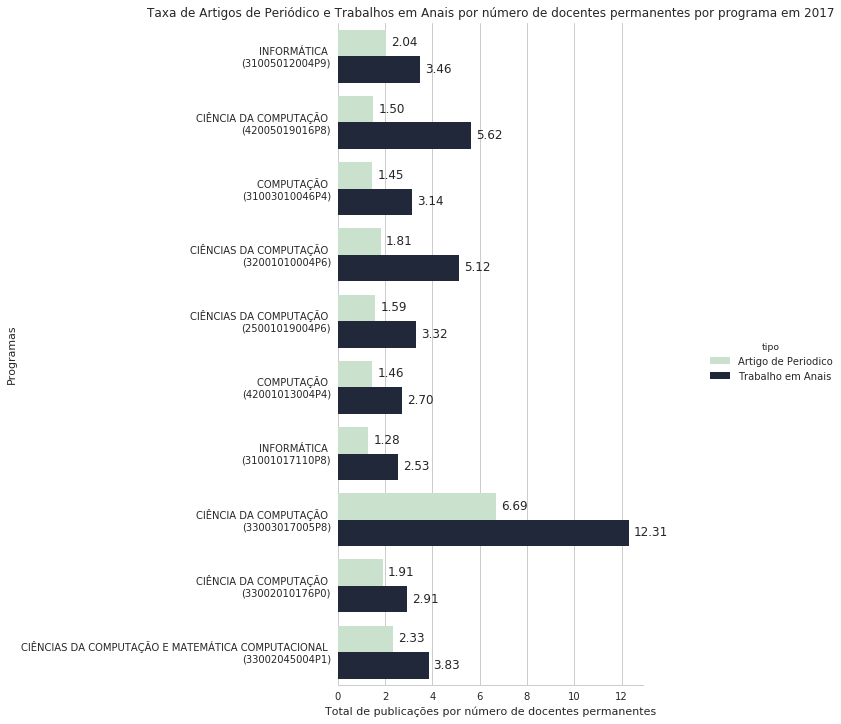

In [256]:
import seaborn as sns
import matplotlib.pyplot as plt

# Preparar gráfico de barras para vizualização
sns.set(style="whitegrid")

# Adicionar dados ao gráfico, definir tipo do gráfico e algumas definições de estilo
g = sns.factorplot(x="fracao_tipo", y="programa", hue="tipo", data=_new_table,
                   size=10, kind="bar", palette=sns.cubehelix_palette(2, rot=-.4))

g.despine(left=True)

# Adicionar labels aos eixos
g.set_xlabels("Total de publicações por número de docentes permanentes")
g.set_ylabels("Programas")

# Adionar titulo ao grafico
axes = g.axes.flatten()
axes[0].set_title("Taxa de Artigos de Periódico e Trabalhos em Anais por número de docentes permanentes por programa em 2017")
# g.set_xticklabels(rotation=30)

# Anotações da porcentagem ao lado das barras
for i, p in enumerate(axes[0].patches):
    axes[0].annotate("{:.{}f}".format( p.get_width(), 2 ),
                (p.get_x() + p.get_width(), p.get_y() + 0.4),
                xytext=(5, 10), textcoords='offset points')

plt.show()

### Questão 11

Qual fração de artigos de periódico/trabalhos em anais publicados em 2017 teve a coautoria de discentes?

###### Reorganizar tabelas (retirar colunas desnecessárias para a questão)

In [271]:
# Utilizando uma variavel auxiliar para mexer com a tabela
aux_producao_data = producao_data.copy()

necessary_columns = ['subtipo', 'ano', 'num_discentes']

# Manter somente as colunas necessárias na tabela
to_drop_in_producao = []
for column_name in aux_producao_data.columns: # Para cada coluna da tabela de discentes
    if(column_name not in necessary_columns): # Selecionar colunas desncessárias
        to_drop_in_producao.append(column_name)

aux_producao_data = aux_producao_data.drop(to_drop_in_producao, 1) # Retirar colunas desnecessárias

In [272]:
# aux_producao_data.head()

###### Definir dados necessários (total de artigos de periodicos/trabalhos em anais com coautoria de discentes em 2017)

In [273]:
import array
        
# Definir o total de artigos de periodico/trabalhos em anais com/sem coautoria de discentes em 2017
periodico_com_coautoria = 0
anais_com_coautoria = 0
total_periodicos = 0
total_anais = 0

for index, row in aux_producao_data.iterrows():
    ano = row['ano']
    subtipo = row['subtipo']
    coautoria = row['num_discentes']
    if(isinstance(ano, float) and ano == 2017):
        if(isinstance(subtipo, str)):
            if(subtipo == 'TRABALHO EM ANAIS'):
                total_anais += 1
                if(isinstance(coautoria, int) and coautoria > 0):
                    anais_com_coautoria += 1
            elif(subtipo == 'ARTIGO EM PERIÓDICO'):
                total_periodicos +=1
                if(isinstance(coautoria, int) and coautoria > 0):
                    periodico_com_coautoria += 1
                    
_final_periodico_com_coautoria = (float) (periodico_com_coautoria / total_periodicos * 100)
_final_anais_com_coautoria = (float) (anais_com_coautoria / total_anais * 100)

###### Agrupar os dados em um DataFrame para a vizualização

In [274]:
# Definir as colunas do data frame
_new_columns = ['tipo', 'coautoria']

# Criar data
_new_data = []

# Adicionar dados a data
_new_data.append(['Artigo de Periodico', _final_periodico_com_coautoria])
_new_data.append(['Trabalho em Anais', _final_anais_com_coautoria])

# Criar data frame com as colunas e a data
_new_table = pd.DataFrame(data = _new_data, columns = _new_columns)

###### Gráfico para vizualização dos dados

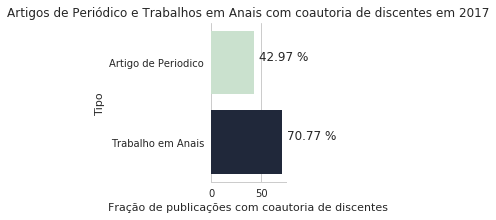

In [275]:
import seaborn as sns
import matplotlib.pyplot as plt

# Preparar gráfico de barras para vizualização
sns.set(style="whitegrid")

# Adicionar dados ao gráfico, definir tipo do gráfico e algumas definições de estilo
g = sns.factorplot(x="coautoria", y="tipo", data=_new_table,
                   size=3, kind="bar", palette=sns.cubehelix_palette(2, rot=-.4))

g.despine(left=True)

# Adicionar labels aos eixos
g.set_xlabels("Fração de publicações com coautoria de discentes")
g.set_ylabels("Tipo")

# Adionar titulo ao grafico
axes = g.axes.flatten()
axes[0].set_title("Artigos de Periódico e Trabalhos em Anais com coautoria de discentes em 2017")
# g.set_xticklabels(rotation=30)

# Anotações da porcentagem ao lado das barras
for i, p in enumerate(axes[0].patches):
    axes[0].annotate("{:.{}f} %".format( p.get_width(), 2 ),
                (p.get_x() + p.get_width(), p.get_y() + 0.5),
                xytext=(5, 10), textcoords='offset points')

plt.show()

### Questão 12

Qual fração de artigos de periódico/trabalhos em anais publicados em 2017 teve a coautoria de participantes externos?

###### Reorganizar tabelas (retirar colunas desnecessárias para a questão)

In [276]:
# Utilizando uma variavel auxiliar para mexer com a tabela
aux_producao_data = producao_data.copy()

necessary_columns = ['subtipo', 'ano', 'num_externos']

# Manter somente as colunas necessárias na tabela
to_drop_in_producao = []
for column_name in aux_producao_data.columns: # Para cada coluna da tabela de discentes
    if(column_name not in necessary_columns): # Selecionar colunas desncessárias
        to_drop_in_producao.append(column_name)

aux_producao_data = aux_producao_data.drop(to_drop_in_producao, 1) # Retirar colunas desnecessárias

In [277]:
# aux_producao_data.head()

###### Definir dados necessários (total de artigos de periodicos/trabalhos em anais com coautoria de externos em 2017)

In [278]:
import array
        
# Definir o total de artigos de periodico/trabalhos em anais com/sem coautoria de discentes em 2017
periodico_com_coautoria = 0
anais_com_coautoria = 0
total_periodicos = 0
total_anais = 0

for index, row in aux_producao_data.iterrows():
    ano = row['ano']
    subtipo = row['subtipo']
    coautoria = row['num_externos']
    if(isinstance(ano, float) and ano == 2017):
        if(isinstance(subtipo, str)):
            if(subtipo == 'TRABALHO EM ANAIS'):
                total_anais += 1
                if(isinstance(coautoria, int) and coautoria > 0):
                    anais_com_coautoria += 1
            elif(subtipo == 'ARTIGO EM PERIÓDICO'):
                total_periodicos +=1
                if(isinstance(coautoria, int) and coautoria > 0):
                    periodico_com_coautoria += 1
                    
_final_periodico_com_coautoria = (float) (periodico_com_coautoria / total_periodicos * 100)
_final_anais_com_coautoria = (float) (anais_com_coautoria / total_anais * 100)

###### Agrupar os dados em um DataFrame para a vizualização

In [279]:
# Definir as colunas do data frame
_new_columns = ['tipo', 'coautoria']

# Criar data
_new_data = []

# Adicionar dados a data
_new_data.append(['Artigo de Periodico', _final_periodico_com_coautoria])
_new_data.append(['Trabalho em Anais', _final_anais_com_coautoria])

# Criar data frame com as colunas e a data
_new_table = pd.DataFrame(data = _new_data, columns = _new_columns)

###### Gráfico para vizualização dos dados

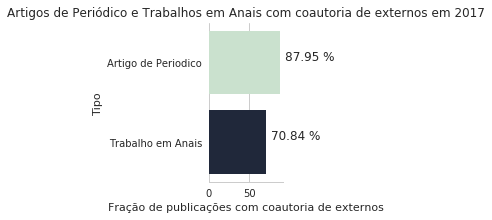

In [280]:
import seaborn as sns
import matplotlib.pyplot as plt

# Preparar gráfico de barras para vizualização
sns.set(style="whitegrid")

# Adicionar dados ao gráfico, definir tipo do gráfico e algumas definições de estilo
g = sns.factorplot(x="coautoria", y="tipo", data=_new_table,
                   size=3, kind="bar", palette=sns.cubehelix_palette(2, rot=-.4))

g.despine(left=True)

# Adicionar labels aos eixos
g.set_xlabels("Fração de publicações com coautoria de externos")
g.set_ylabels("Tipo")

# Adionar titulo ao grafico
axes = g.axes.flatten()
axes[0].set_title("Artigos de Periódico e Trabalhos em Anais com coautoria de externos em 2017")
# g.set_xticklabels(rotation=30)

# Anotações da porcentagem ao lado das barras
for i, p in enumerate(axes[0].patches):
    axes[0].annotate("{:.{}f} %".format( p.get_width(), 2 ),
                (p.get_x() + p.get_width(), p.get_y() + 0.5),
                xytext=(5, 10), textcoords='offset points')

plt.show()

### Questão 13

Qual é a distribuição de artigos de periódico publicados em 2017, por estrato do Qualis?

###### Definir DataFrame da Tabela da Qualis

In [281]:
import pandas as pd

excel_file = "in.data/Qualis CC 2013-2016.xlsx"
qualis_raw = pd.read_excel(excel_file)
qualis_data = qualis_raw
qualis_data.rename(columns = {'ISSN': 'issn', 'Título': 'periodico', 'Estrato': 'estrato'}, inplace=True)
# qualis_data.head()

###### Reorganizar tabelas (retirar colunas desnecessárias)

In [282]:
# Utilizando uma variavel auxiliar para mexer com a tabela
aux_producao_data = producao_data.copy()

necessary_columns = ['periodico', 'ano', 'subtipo', 'issn']

# Manter somente as colunas necessárias na tabela
to_drop_in_producao = []
for column_name in aux_producao_data.columns: # Para cada coluna da tabela de discentes
    if(column_name not in necessary_columns): # Selecionar colunas desncessárias
        to_drop_in_producao.append(column_name)

aux_producao_data = aux_producao_data.drop(to_drop_in_producao, 1) # Retirar colunas desnecessárias

In [283]:
# aux_producao_data.head()

###### Preparação de Dados para RIGHT JOIN

In [284]:
# Tratar strings: tenta  verificar se a string pertence à algum grupo e adicioná-la à ele, ou criar um novo grupo para ela
def remove_issn(c):
    if(not isinstance(c, str)):
        return c
    else:
        nome_periodico = c[12:]
        return nome_periodico
    
# Aplica o tratamento de strings às tabelas auxiliares
for column in aux_producao_data:
    if(column == 'periodico'):
        aux_producao_data[column] = aux_producao_data[column].apply(remove_issn)

In [285]:
# aux_producao_data.head()

###### RIGHT JOIN das tabelas

In [286]:
# Mergeando as tabelas

merged_qualis_producao = pd.merge(qualis_data, aux_producao_data, how='right', on=['issn', 'periodico'])
# merged_qualis_producao.head()

###### Definir dados necessários (total de artigos de periodicos publicados em 2017 por estrato da Qualis)

In [287]:
import array
        
# Definir quais são todos os diferentes estratos
estratos = []

for index, row in qualis_data.iterrows():
    estrato = row['estrato']
    if(estrato not in estratos and isinstance(estrato, str)):
        estratos.append(estrato)

# Definir o total de artigos de periodico/trabalhos em anais com/sem coautoria de discentes em 2017
periodico_por_extrato = array.array('i', (0 for i in range(0, len(estratos))))

for index, row in merged_qualis_producao.iterrows():
    ano = row['ano']
    subtipo = row['subtipo']
    estrato = row['estrato']
    if(isinstance(ano, float) and ano == 2017):
        if(isinstance(subtipo, str)):
            if(subtipo == 'ARTIGO EM PERIÓDICO'):
                if(isinstance(estrato, str)):
                    index = estratos.index(estrato)
                    periodico_por_extrato[index] += 1

###### Agrupar os dados em um DataFrame para a vizualização

In [288]:
# Definir as colunas do data frame
_new_columns = ['estrato', 'total_periodicos']

# Criar data
_new_data = []

# Adicionar dados a data
for estrato in estratos:
    index = estratos.index(estrato)
    _new_data.append([estrato, periodico_por_extrato[index]])

# Criar data frame com as colunas e a data
_new_table = pd.DataFrame(data = _new_data, columns = _new_columns)

###### Gráfico para vizualização dos dados

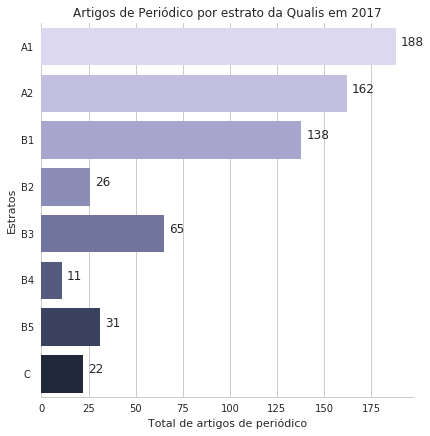

In [292]:
import seaborn as sns
import matplotlib.pyplot as plt

# Preparar gráfico de barras para vizualização
sns.set(style="whitegrid")

# Adicionar dados ao gráfico, definir tipo do gráfico e algumas definições de estilo
g = sns.factorplot(x="total_periodicos", y="estrato", data=_new_table,
                   size=6, kind="bar", palette=sns.cubehelix_palette(8, start=2.8, rot=.1))

g.despine(left=True)

# Adicionar labels aos eixos
g.set_xlabels("Total de artigos de periódico")
g.set_ylabels("Estratos")

# Adionar titulo ao grafico
axes = g.axes.flatten()
axes[0].set_title("Artigos de Periódico por estrato da Qualis em 2017")
# g.set_xticklabels(rotation=30)

# Anotações da porcentagem ao lado das barras
for i, p in enumerate(axes[0].patches):
    axes[0].annotate("{:.{}f}".format( p.get_width(), 0),
                (p.get_x() + p.get_width(), p.get_y() + 0.6),
                xytext=(5, 10), textcoords='offset points')

plt.show()

### Questão 14

Considerando os pesos dos artigos de cada estrato do índice restrito ({'A1': 1, 'A2': 0.85, 'B1': 0.70}), qual o índice restrito relativo de cada programa, considerando apenas os artigos em periódicos, e dividido pelo número de docentes permanentes (ordenado do maior para o menor)?

###### Reorganizar tabelas (retirar colunas desncessárias)

In [293]:
# Utilizando uma variavel auxiliar para mexer com a tabela
aux_producao_data = producao_data.copy()

necessary_columns = ['periodico', 'programa', 'subtipo', 'issn']

# Manter somente as colunas necessárias na tabela
to_drop_in_producao = []
for column_name in aux_producao_data.columns: # Para cada coluna da tabela de discentes
    if(column_name not in necessary_columns): # Selecionar colunas desncessárias
        to_drop_in_producao.append(column_name)

aux_producao_data = aux_producao_data.drop(to_drop_in_producao, 1) # Retirar colunas desnecessárias

In [294]:
# aux_producao_data.head()

###### Preparação de dados para RIGHT JOIN

In [295]:
# Tratar strings: tenta  verificar se a string pertence à algum grupo e adicioná-la à ele, ou criar um novo grupo para ela
def remove_issn(c):
    if(not isinstance(c, str)):
        return c
    else:
        nome_periodico = c[12:]
        return nome_periodico
    
# Aplica o tratamento de strings às tabelas auxiliares
for column in aux_producao_data:
    if(column == 'periodico'):
        aux_producao_data[column] = aux_producao_data[column].apply(remove_issn)

In [296]:
# aux_producao_data.head()

###### RIGHT JOIN

In [297]:
# Mergeando as tabelas

merged_qualis_producao = pd.merge(qualis_data, aux_producao_data, how='right', on=['issn', 'periodico'])
# merged_qualis_producao.head()

###### Definir dados necessários (total de artigos de periódico de cada estrato do índice restrito por programa)

In [298]:
import array

# Definir indice restrito
indice_restrito = ['A1', 'A2', 'B1']
valores_indice_restrito = {'A1': 1, 'A2': 0.85, 'B1': 0.70}
        
# Definir quais são todos os diferentes programas
programas = []

for index, row in aux_producao_data.iterrows():
    programa = row['programa']
    if(programa not in programas and isinstance(programa, str)):
        programas.append(programa)

# Definir o total de artigos de periodico de cada estrato do índice restrito por programa
periodico_por_extrato_por_programa = {}
for programa in programas:
    periodico_por_extrato_por_programa[programa] = {}
    for indice in indice_restrito:
        periodico_por_extrato_por_programa[programa][indice] = 0
        
for index, row in merged_qualis_producao.iterrows():
    programa = row['programa']
    subtipo = row['subtipo']
    estrato = row['estrato']
    if(isinstance(programa, str)):
        if(isinstance(subtipo, str)):
            if(subtipo == 'ARTIGO EM PERIÓDICO'): # Se é um artigo em periódico
                if(estrato in indice_restrito): # Se o estrato pertence ao índice restrito
                    periodico_por_extrato_por_programa[programa][estrato] += 1 # Adiciona um artigo àquele programa pelo índice
                    
# Definir a fração de alunos de mestrado/doutorado que defenderam em 2017 por programa
_final_periodico_por_extrato_por_programa = {}

for programa in programas:
    indice_relativo_programa = 0
#     total_de_artigos_no_programa = 0
    for indice in indice_restrito:
        total_de_artigos_no_indice = periodico_por_extrato_por_programa[programa][indice]
        indice_relativo_programa += total_de_artigos_no_indice * valores_indice_restrito[indice]
#         total_de_artigos_no_programa += total_de_artigos_no_indice
#     indice_relativo_programa = indice_relativo_programa / total_de_artigos_no_programa
    value = float(indice_relativo_programa / len(docentes_por_programa[programa]))
    index = programas.index(programa)
    _final_periodico_por_extrato_por_programa[index] = value
         
# Refatorar os nomes dos programas (break lines entre nome do programa e número do programa)
_final_programas = []
        
def treat_x_labels(labels):
    for label in labels:
        index = label.index('(');
        nome_programa = label[:index]
        num_programa = label[index:]
        _final_programas.append(nome_programa + '\n' + num_programa)

treat_x_labels(programas)

In [299]:
# _final_periodico_por_extrato_por_programa

###### Agrupando os dados em um DataFrame para vizualização

In [300]:
# Definir as colunas do data frame
_new_columns = ['programa', 'fracao_indice_docentes']

# Criar data
_new_data = []

# Adicionar dados a data
for programa in _final_programas:
    index = _final_programas.index(programa)
    _new_data.append([programa, _final_periodico_por_extrato_por_programa[index]])

# Criar data frame com as colunas e a data
_new_table = pd.DataFrame(data = _new_data, columns = _new_columns)

_new_table = _new_table.sort_values('fracao_indice_docentes', ascending=False)

###### Gráfico para vizualização dos dados

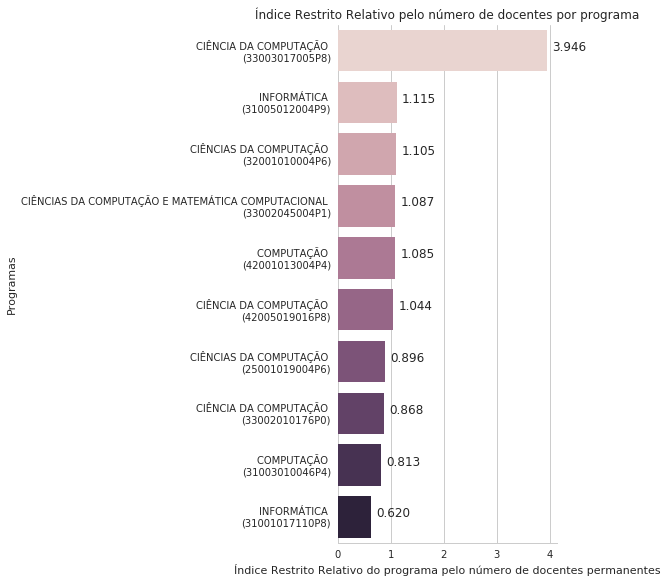

In [301]:
import seaborn as sns
import matplotlib.pyplot as plt

# Preparar gráfico de barras para vizualização
sns.set(style="whitegrid")

# Adicionar dados ao gráfico, definir tipo do gráfico e algumas definições de estilo
g = sns.factorplot(x="fracao_indice_docentes", y="programa", data=_new_table,
                   size=8, kind="bar", palette=sns.cubehelix_palette(10))

g.despine(left=True)

# Adicionar labels aos eixos
g.set_xlabels("Índice Restrito Relativo do programa pelo número de docentes permanentes")
g.set_ylabels("Programas")

# Adionar titulo ao grafico
axes = g.axes.flatten()
axes[0].set_title("Índice Restrito Relativo pelo número de docentes por programa")
# g.set_xticklabels(rotation=30)

# Anotações da porcentagem ao lado das barras
for i, p in enumerate(axes[0].patches):
    axes[0].annotate("{:.{}f}".format( p.get_width(), 3),
                (p.get_x() + p.get_width(), p.get_y() + 0.6),
                xytext=(5, 10), textcoords='offset points')

plt.show()

### Questão 15

Considerando os pesos dos artigos de cada estrato do índice geral ({'A1': 1, 'A2': 0.85, 'B1': 0.70, 'B2': 0.50, 'B3': 0.20, 'B4': 0.10, 'B5': 0.05, 'C': 0.0}), qual o índice geral relativo de cada programa, considerando apenas os artigos em periódicos, e dividido pelo número de docentes permanentes (ordenado do maior para o menor)?

###### Reorganizar tabelas (retirar colunas desnecessárias)

In [302]:
# Utilizando uma variavel auxiliar para mexer com a tabela
aux_producao_data = producao_data.copy()

necessary_columns = ['periodico', 'programa', 'subtipo', 'issn']

# Manter somente as colunas necessárias na tabela
to_drop_in_producao = []
for column_name in aux_producao_data.columns: # Para cada coluna da tabela de discentes
    if(column_name not in necessary_columns): # Selecionar colunas desncessárias
        to_drop_in_producao.append(column_name)

aux_producao_data = aux_producao_data.drop(to_drop_in_producao, 1) # Retirar colunas desnecessárias

###### Preparação de dados para RIGHT JOIN

In [303]:
# Tratar strings: tenta  verificar se a string pertence à algum grupo e adicioná-la à ele, ou criar um novo grupo para ela
def remove_issn(c):
    if(not isinstance(c, str)):
        return c
    else:
        nome_periodico = c[12:]
        return nome_periodico
    
# Aplica o tratamento de strings às tabelas auxiliares
for column in aux_producao_data:
    if(column == 'periodico'):
        aux_producao_data[column] = aux_producao_data[column].apply(remove_issn)

###### RIGHT JOIN

In [304]:
# Mergeando as tabelas

merged_qualis_producao = pd.merge(qualis_data, aux_producao_data, how='right', on=['issn', 'periodico'])
# merged_qualis_producao.head()

###### Definir dados necessários (total de artigos de periódico de cada estrato do índice restrito por programa)

In [305]:
import array

# Definir indice restrito
indice_geral = ['A1', 'A2', 'B1', 'B2', 'B3', 'B4', 'B5', 'C']
valores_indice_geral = {'A1': 1, 'A2': 0.85, 'B1': 0.70, 'B2': 0.50, 'B3': 0.20, 'B4': 0.10, 'B5': 0.05, 'C': 0.0}
        
# Definir quais são todos os diferentes programas
programas = []

for index, row in aux_producao_data.iterrows():
    programa = row['programa']
    if(programa not in programas and isinstance(programa, str)):
        programas.append(programa)

# Definir o total de artigos de periodico de cada estrato do índice restrito por programa
periodico_por_extrato_por_programa = {}
for programa in programas:
    periodico_por_extrato_por_programa[programa] = {}
    for indice in indice_geral:
        periodico_por_extrato_por_programa[programa][indice] = 0
        
for index, row in merged_qualis_producao.iterrows():
    programa = row['programa']
    subtipo = row['subtipo']
    estrato = row['estrato']
    if(isinstance(programa, str)):
        if(isinstance(subtipo, str)):
            if(subtipo == 'ARTIGO EM PERIÓDICO'): # Se é um artigo em periódico
                if(estrato in indice_geral): # Se o estrato pertence ao índice restrito
                    periodico_por_extrato_por_programa[programa][estrato] += 1 # Adiciona um artigo àquele programa pelo índice
                    
# Definir a fração de alunos de mestrado/doutorado que defenderam em 2017 por programa
_final_periodico_por_extrato_por_programa = {}

for programa in programas:
    indice_relativo_programa = 0
#     total_de_artigos_no_programa = 0
    for indice in indice_geral:
        total_de_artigos_no_indice = periodico_por_extrato_por_programa[programa][indice]
        indice_relativo_programa += total_de_artigos_no_indice * valores_indice_geral[indice]
#         total_de_artigos_no_programa += total_de_artigos_no_indice
#     indice_relativo_programa = indice_relativo_programa / total_de_artigos_no_programa
    value = float(indice_relativo_programa / len(docentes_por_programa[programa]))
    index = programas.index(programa)
    _final_periodico_por_extrato_por_programa[index] = value
         
# Refatorar os nomes dos programas (break lines entre nome do programa e número do programa)
_final_programas = []
        
def treat_x_labels(labels):
    for label in labels:
        index = label.index('(');
        nome_programa = label[:index]
        num_programa = label[index:]
        _final_programas.append(nome_programa + '\n' + num_programa)

treat_x_labels(programas)

###### Agrupando os dados em um DataFrame para vizualização

In [306]:
# Definir as colunas do data frame
_new_columns = ['programa', 'fracao_indice_docentes']

# Criar data
_new_data = []

# Adicionar dados a data
for programa in _final_programas:
    index = _final_programas.index(programa)
    _new_data.append([programa, _final_periodico_por_extrato_por_programa[index]])

# Criar data frame com as colunas e a data
_new_table = pd.DataFrame(data = _new_data, columns = _new_columns)

_new_table = _new_table.sort_values('fracao_indice_docentes', ascending=False)

###### Gráfico para vizualização dos dados

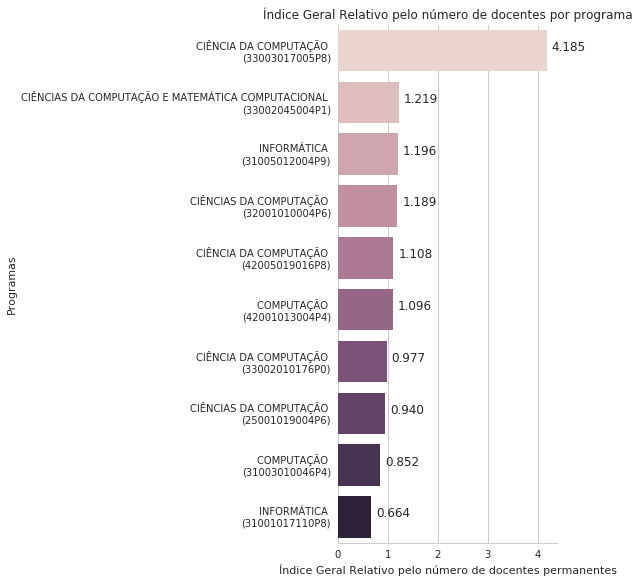

In [307]:
import seaborn as sns
import matplotlib.pyplot as plt

# Preparar gráfico de barras para vizualização
sns.set(style="whitegrid")

# Adicionar dados ao gráfico, definir tipo do gráfico e algumas definições de estilo
g = sns.factorplot(x="fracao_indice_docentes", y="programa", data=_new_table,
                   size=8, kind="bar", palette=sns.cubehelix_palette(10))

g.despine(left=True)

# Adicionar labels aos eixos
g.set_xlabels("Índice Geral Relativo pelo número de docentes permanentes")
g.set_ylabels("Programas")

# Adionar titulo ao grafico
axes = g.axes.flatten()
axes[0].set_title("Índice Geral Relativo pelo número de docentes por programa")
# g.set_xticklabels(rotation=30)

# Anotações da porcentagem ao lado das barras
for i, p in enumerate(axes[0].patches):
    axes[0].annotate("{:.{}f}".format( p.get_width(), 3),
                (p.get_x() + p.get_width(), p.get_y() + 0.6),
                xytext=(5, 10), textcoords='offset points')

plt.show()